# Курсовая работа по дисциплине «Структуры и алгоритмы обработки данных» 
## Выполнил студент группы БФИ2205 Ясинский Д.В.
### Задача: 
#### Написать программу, которая будет считывать данные из СSV файла, содержащего информацию о продажах товаров в магазине. Данные в файле содержатся в следующем формате:

| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена
за единицу | Общая стоимость |

### Необходимо:

1. Рассчитать общую выручку магазина.

2. Найти товар, который был продан наибольшее количество раз.

3. Найти товар, который принес наибольшую выручку.

4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.

##### Для решения задач необходимо использовать структуры данных, такие как массивы и хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск. Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в соответствии с требованиями.

### Импортируем необходимые нам библиотеки

In [10]:
import csv
import matplotlib.pyplot as plt
from PyQt5.QtWidgets import QApplication, QFileDialog
from PyQt5.QtWidgets import QWidget, QVBoxLayout, QTableWidget, QTableWidgetItem, QApplication, QMessageBox
from collections import defaultdict

### Реализация чтения данных о продажах из файла CSV

In [11]:
def readsales(filename):
    sales_data = []
    with open(filename, 'r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            sales_data.append({
                'order_number': row['Номер заказа'],
                'order_date': row['Дата заказа'],
                'product_name': row['Название товара'],
                'category': row['Категория товара'],
                'quantity': int(row['Количество продаж']),
                'unit_price': float(row['Цена за единицу']),
                'total_price': float(row['Общая стоимость'])
            })
    return sales_data

def choose_file():
    app = QApplication([])
    filename, _ = QFileDialog.getOpenFileName(None, "Выберите файл CSV", "", "CSV files (*.csv)")
    return filename

filename = choose_file()
if not filename:
    print("Ошибка: Файл не выбран или выбор отменен.")
else:
    sales_data = readsales(filename)
    print("Данные из CSV файла успешно прочитаны.")

Данные из CSV файла успешно прочитаны.


### Реализация анализа продаж с помощью хэш-таблицы. Задействован метод цепочек

In [12]:
class Hash:
    def __init__(self, size=100):
        self.size = size
        self.table = [None] * self.size
    
    def _hash(self, key):
        return hash(key) % self.size
    
    def insert(self, key, value):
        hash_key = self._hash(key)
        if self.table[hash_key] is None:
            self.table[hash_key] = [(key, value)]
        else:
            for i, (k, _) in enumerate(self.table[hash_key]):
                if k == key:
                    self.table[hash_key][i] = (key, value)
                    break
            else:
                self.table[hash_key].append((key, value))
    
    def search(self, key):
        hash_key = self._hash(key)
        if self.table[hash_key] is not None:
            for k, v in self.table[hash_key]:
                if k == key:
                    return v
        return None

class Salyzer:
    def __init__(self, sales_data):
        self.sales_data = sales_data
        self.hash_table = Hash()
        for item in sales_data:
            self.hash_table.insert(item['product_name'], item)
    
    def calculate(self):
        total_revenue = sum(item['total_price'] for item in self.sales_data)
        return total_revenue

    def findmost(self):
        product_sales = defaultdict(int)
        for item in self.sales_data:
            product_sales[item['product_name']] += item['quantity']
        most_sold_product = max(product_sales, key=product_sales.get)
        return most_sold_product

    def findhighest(self):
        revenue_by_product = defaultdict(float)
        for item in self.sales_data:
            revenue_by_product[item['product_name']] += item['total_price']
        highest_revenue_product = max(revenue_by_product, key=revenue_by_product.get)
        return highest_revenue_product

analyzer = Salyzer(sales_data)
total_revenue = analyzer.calculate()
print("Общая выручка магазина:", total_revenue)

most_sold_product = analyzer.findmost()
print("Товар, проданный наибольшее количество раз:", most_sold_product)

highest_revenue_product = analyzer.findhighest()
print("Товар, принесший наибольшую выручку:", highest_revenue_product)

Общая выручка магазина: 464500.0
Товар, проданный наибольшее количество раз: Коврик для мыши Dexp
Товар, принесший наибольшую выручку: Планшет Oppo


### Создается отчет о продажах, включая общую выручку, количество проданных единиц каждого товара и их долю в общей выручке. Также происходит сортировка товаров по количеству продаж.

In [13]:
def generate(sales_data, total_revenue):
    def quick(arr):
        if len(arr) <= 1:
            return arr
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x[0] < pivot[0]]
        middle = [x for x in arr if x[0] == pivot[0]]
        right = [x for x in arr if x[0] > pivot[0]]
        return quick(left) + middle + quick(right)

    report = "Отчет о продажах:\n"
    report += f"Общая выручка: {total_revenue}\n\n"
    report += "Количество проданных единиц каждого товара и их доля в общей выручке:\n"
    product_sales = defaultdict(int)
    for item in sales_data:
        product_sales[item['product_name']] += item['quantity']
    for product, quantity in product_sales.items():
        revenue = sum(item['total_price'] for item in sales_data if item['product_name'] == product)
        revenue_percentage = (revenue / total_revenue) * 100
        report += f"{product}: Продано {quantity} единиц ({revenue_percentage:.2f}% выручки)\n"
    
    sortedprod = quick([(quantity, product) for product, quantity in product_sales.items()])
    sortedprod.reverse()

    report += "\nТоп товаров по количеству проданных единиц:\n"
    for quantity, product in sortedprod:
        report += f"{product}: {quantity} единиц\n"

    return report

report = generate(sales_data, total_revenue)
print(report)

Отчет о продажах:
Общая выручка: 464500.0

Количество проданных единиц каждого товара и их доля в общей выручке:
Смартфон Vivo: Продано 5 единиц (5.38% выручки)
Ноутбук: Продано 2 единиц (12.92% выручки)
Мышь Lamzu Atlantics: Продано 10 единиц (1.08% выручки)
Клавиатура Dark Project: Продано 7 единиц (2.26% выручки)
Монитор MSI: Продано 3 единиц (7.75% выручки)
Принтер HP: Продано 1 единиц (3.23% выручки)
Смартфон Xiaomi Redmi 12: Продано 4 единиц (17.22% выручки)
Планшет Oppo: Продано 6 единиц (32.29% выручки)
Коврик для мыши Dexp: Продано 15 единиц (0.65% выручки)
Камера: Продано 2 единиц (17.22% выручки)

Топ товаров по количеству проданных единиц:
Коврик для мыши Dexp: 15 единиц
Мышь Lamzu Atlantics: 10 единиц
Клавиатура Dark Project: 7 единиц
Планшет Oppo: 6 единиц
Смартфон Vivo: 5 единиц
Смартфон Xiaomi Redmi 12: 4 единиц
Монитор MSI: 3 единиц
Камера: 2 единиц
Ноутбук: 2 единиц
Принтер HP: 1 единиц



### Вывод результатов продаж в виде визуального интерфейса таблицы

In [14]:
class SalesTableWidget(QWidget):
    def __init__(self, sales_data):
        super().__init__()

        layout = QVBoxLayout()
        self.setLayout(layout)

        table = QTableWidget()
        table.setRowCount(len(sales_data))
        table.setColumnCount(7)
        table.setHorizontalHeaderLabels(['Номер заказа', 'Дата заказа', 'Название товара', 'Категория товара', 'Продано', 'Цена за единицу', 'Общая стоимость'])
        layout.addWidget(table)

        row = 0
        for item in sales_data:
            table.setItem(row, 0, QTableWidgetItem(item['order_number']))
            table.setItem(row, 1, QTableWidgetItem(item['order_date']))
            table.setItem(row, 2, QTableWidgetItem(item['product_name']))
            table.setItem(row, 3, QTableWidgetItem(item['category']))
            table.setItem(row, 4, QTableWidgetItem(str(item['quantity'])))
            table.setItem(row, 5, QTableWidgetItem(str(item['unit_price'])))
            table.setItem(row, 6, QTableWidgetItem(str(item['total_price'])))
            row += 1

        table.resizeColumnsToContents()
        table.resizeRowsToContents() 

        self.setWindowTitle("Отчет о продажах")
        self.resize(800, 600)
        self.show()

    def closeEvent(self, event):
        reply = QMessageBox.question(self, 'Подтверждение закрытия',
                                     "Вы уверены, что хотите закрыть приложение?",
                                     QMessageBox.Yes | QMessageBox.No, QMessageBox.No)

        if reply == QMessageBox.Yes:
            event.accept()
        else:
            event.ignore()

app = QApplication([])
table_widget = SalesTableWidget(sales_data)
app.exec_()

product_sales = defaultdict(int)
for item in sales_data:
    product_sales[item['product_name']] += item['total_price']


### Результаты в виде гистограммы

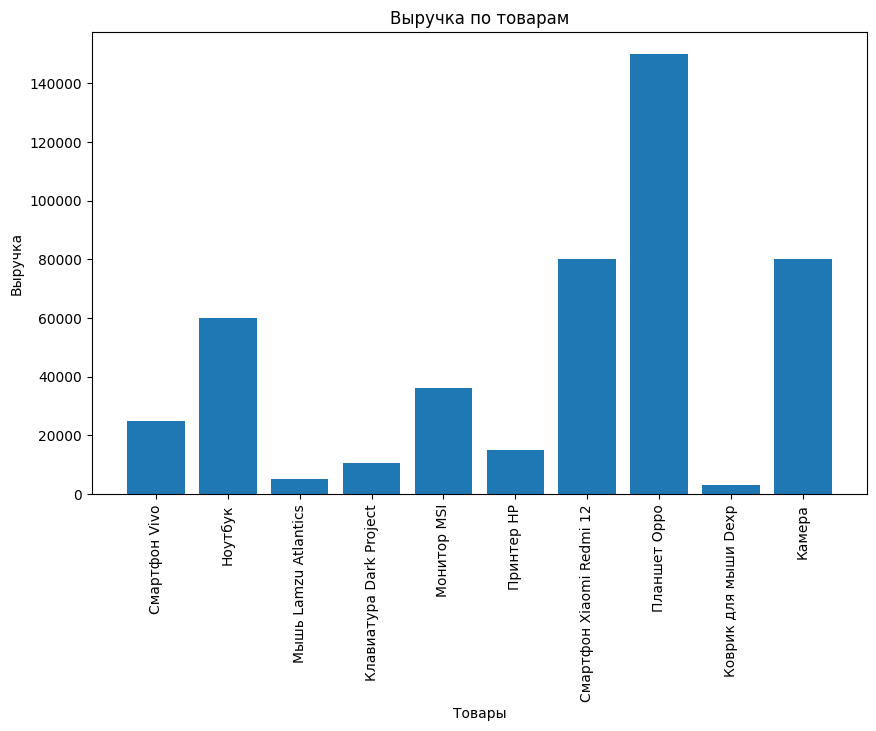

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(product_sales.keys(), product_sales.values())
plt.xlabel('Товары')
plt.ylabel('Выручка')
plt.title('Выручка по товарам')
plt.xticks(rotation=90)
plt.show()

### Результаты в виде круговой диаграммы

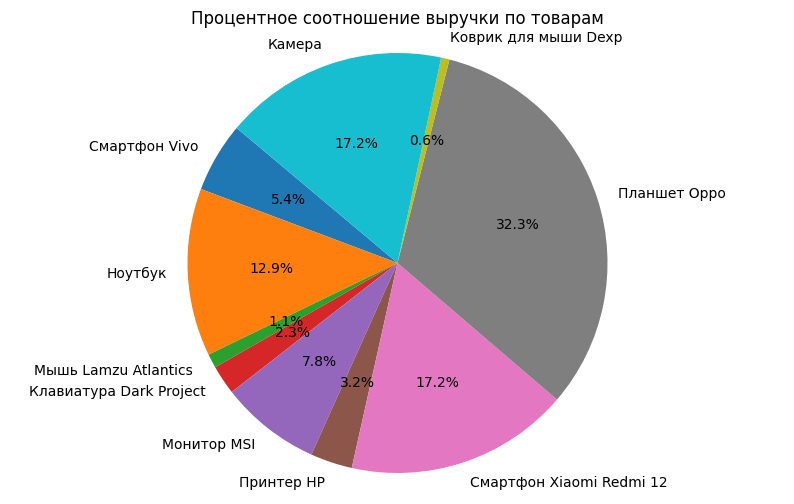

In [16]:
plt.figure(figsize=(10, 6))
plt.pie(product_sales.values(), labels=product_sales.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Процентное соотношение выручки по товарам')
plt.axis('equal')

plt.show()